<a href="https://colab.research.google.com/github/RocioLiu/ML_Resources/blob/master/objectDetection_gluoncv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [2]:
!pip3 install gluoncv

     |████████████████████████████████| 696kB 3.3MB/s 


In [3]:
!pip3 install mxnet

     |████████████████████████████████| 25.4MB 161kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils

In [5]:
net = model_zoo.get_model('mask_rcnn_fpn_resnet101_v1d_coco', pretrained=True)

/usr/local/lib/python3.6/dist-packages/mxnet/gluon/block.py:1159: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


240904KB [00:03, 64706.97KB/s]                            


In [0]:
from PIL import Image
import pandas as pd
import os
import numpy as np

In [0]:
from google.colab import files

In [9]:
uploaded = files.upload()

Saving sannenzaka-kyoto-japan_980x650.jpg to sannenzaka-kyoto-japan_980x650.jpg


In [11]:
!ls

sample_data  sannenzaka-kyoto-japan_980x650.jpg


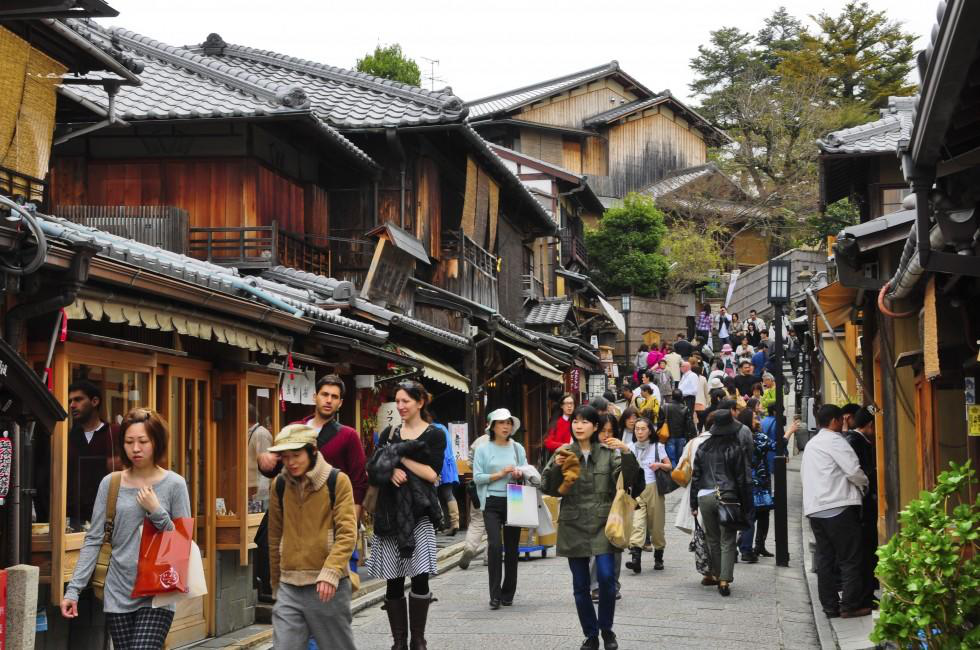

In [12]:
pth = 'sannenzaka-kyoto-japan_980x650.jpg'
Image.open(pth)

In [15]:
%%time
x, orig_img = data.transforms.presets.rcnn.load_test(pth)
ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]

width, height = orig_img.shape[1], orig_img.shape[0]
masks = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
orig_img = utils.viz.plot_mask(orig_img, masks)

# identical to Faster RCNN object detection
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1)
ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                         class_names=net.classes, ax=ax)
plt.show()

ValueError: ignored